In [5]:
import os
import tarfile
import urllib

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [7]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

In [10]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [11]:
housing = load_housing_data()
housing.rename(columns={"longitude": "Dł. geograficzna", "latitude": "Szer. geograficzna", "housing_median_age": "Mediana wieku mieszkań",
                        "total_rooms": "Całk. liczba pokoi", "total_bedrooms": "Całk. liczba sypialni", "population": "Populacja",
                        "households": "Rodziny", "median_income": "Mediana dochodów", "median_house_value": "Mediana cen mieszkań",
                        "ocean_proximity": "Odległość do oceanu"}, inplace=True)

housing.head(10)

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dł. geograficzna        20640 non-null  float64
 1   Szer. geograficzna      20640 non-null  float64
 2   Mediana wieku mieszkań  20640 non-null  float64
 3   Całk. liczba pokoi      20640 non-null  float64
 4   Całk. liczba sypialni   20433 non-null  float64
 5   Populacja               20640 non-null  float64
 6   Rodziny                 20640 non-null  float64
 7   Mediana dochodów        20640 non-null  float64
 8   Mediana cen mieszkań    20640 non-null  float64
 9   Odległość do oceanu     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing['Odległość do oceanu'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: Odległość do oceanu, dtype: int64

In [14]:
housing.describe()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
housing.sum()

Dł. geograficzna                                               -2.46792e+06
Szer. geograficzna                                                   735442
Mediana wieku mieszkań                                               591119
Całk. liczba pokoi                                              5.44022e+07
Całk. liczba sypialni                                           1.09903e+07
Populacja                                                       2.94218e+07
Rodziny                                                         1.03105e+07
Mediana dochodów                                                    79890.6
Mediana cen mieszkań                                             4.2695e+09
Odległość do oceanu       NEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR B...
dtype: object

In [16]:
housing.mean()

Dł. geograficzna            -119.569704
Szer. geograficzna            35.631861
Mediana wieku mieszkań        28.639486
Całk. liczba pokoi          2635.763081
Całk. liczba sypialni        537.870553
Populacja                   1425.476744
Rodziny                      499.539680
Mediana dochodów               3.870671
Mediana cen mieszkań      206855.816909
dtype: float64

In [17]:
housing.min()

Dł. geograficzna            -124.35
Szer. geograficzna            32.54
Mediana wieku mieszkań            1
Całk. liczba pokoi                2
Całk. liczba sypialni             1
Populacja                         3
Rodziny                           1
Mediana dochodów             0.4999
Mediana cen mieszkań          14999
Odległość do oceanu       <1H OCEAN
dtype: object

In [18]:
housing.max()

Dł. geograficzna             -114.31
Szer. geograficzna             41.95
Mediana wieku mieszkań            52
Całk. liczba pokoi             39320
Całk. liczba sypialni           6445
Populacja                      35682
Rodziny                         6082
Mediana dochodów             15.0001
Mediana cen mieszkań          500001
Odległość do oceanu       NEAR OCEAN
dtype: object

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

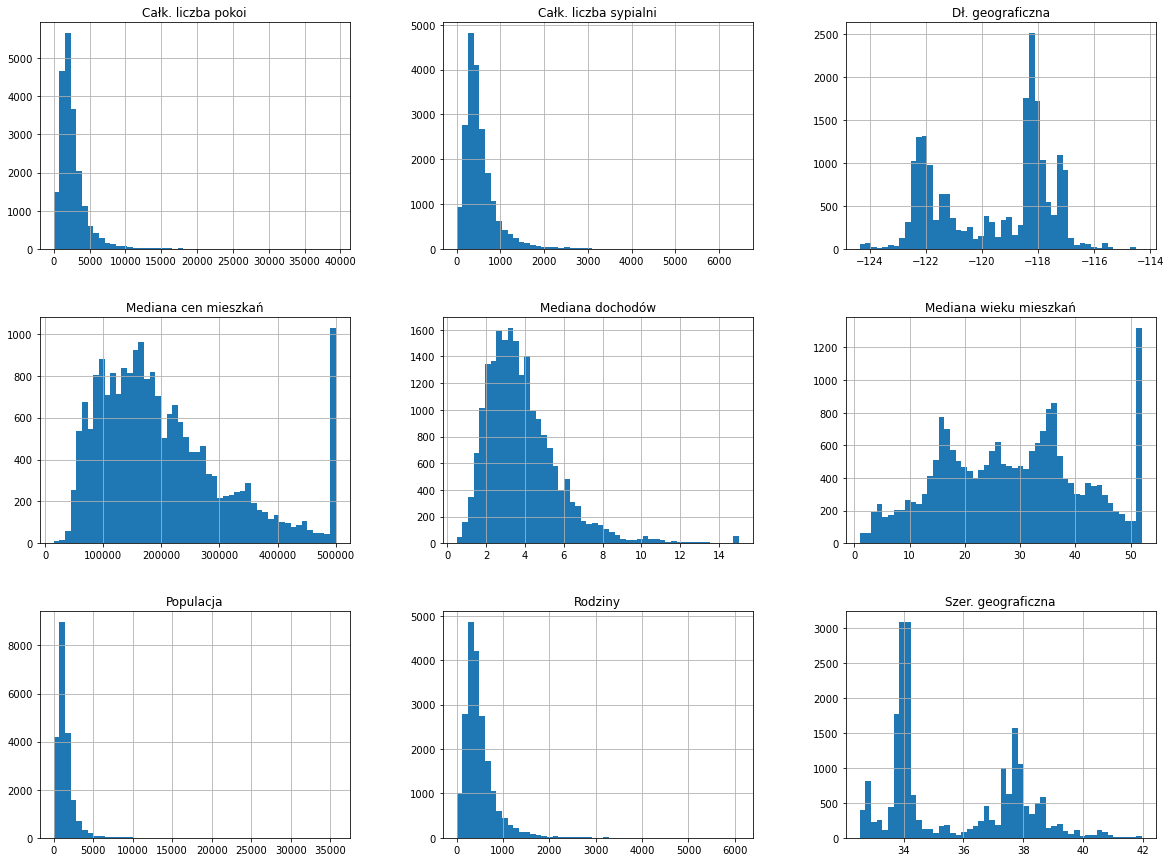

In [20]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Wnioski:**
1. Atrybut miediany dochodów nie przypomina danych podawanych w USD. Dane te zostały przeskalowane i ograniczone do maksymalnej wartości "15" (15,0001) dla wyższej mediany dochodów oraz do minimalnej wartości "0,5" (0,4999) dla niższej mediany dochodów.
<br><br>
2. Ograniczeniu uległy również wartości mediany wieku oraz cen mieszkań. Ta druga informacja może nas szczególnie zmartwić, ponieważ stanowi ona nasz docelowy atrybut (etykieta). Algorytm uczenia maszynowego mogą uznać, że ceny domów nigdy nie przekroczę górnej, ograniczonej wartości. Te ograniczenia problem. Jeśli zespół powie Ci że potrzebne są im Precyzyjne prognozy nawet powyżej wartości 500 000 USD, to pozostaje ci dwie możliwości:
<p>a. uzyskać prawidłowe etykiety dla dystryktów mających obcięte górne wartości cen</p>
   b. usunąć te dystrykty zestawu uczącego (a także testowego, ponieważ system nie powinien być karany, jeżeli będzie przewidywał wartości przekraczającej 500 000 USD)
<br><br>
3. Każdy z tych butów jest ukazane w odmianie skalach, nieraz znacznie zróżnicowanych.
<br><br>
4. Wiele histogramów cechuje się <b>rozkładem długoogonowy</b> (ang. <i> heavy-tailed</i>): Utrudnia to nie co niektórym algorytm uczenia maszynowego rozpoznawanie wzorców.

Jeśli przyjrzysz się zbiorowi testowemu, możesz dostrzec jakiś pozornie interesujący wzorzec, który sprawi, że wybierzesz określony model uczenia maszynowego. Po oszacowaniu błędu ogólnienia za pomocą tego zbioru uzyskane wyniki okażą się nadmierne optymistyczne i uruchomisz system, którego wydajność będzie mniejsza od zakładanej. Zjawisko to jest nazywane **obciążeniem związanym z podglądaniem danych** (ang. *data snooping bias*).

In [21]:
import numpy as np

In [22]:
# Jedynie w celach ilustracyjnych. Moduł Sklearn zawiera funkcję train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [24]:
len(test_set)

4128

In [25]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Zbiór danych *Housing* nie zaweira kolumny z indentyfikatorami. Najprostszym sposobem okazuje się wykorzystanie w tym celu indeksu wiersza.

In [26]:
housing_with_id = housing.reset_index() #Dodaje kolumnę 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [27]:
housing_with_id.rename(columns={'index': 'Indeks'})

,Indeks,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
housing_with_id['id'] = housing['Dł. geograficzna'] * 1000 + housing['Szer. geograficzna']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')
housing_with_id.rename(columns={'index': "Indeks", "id": 'Identyfikator'})

,Indeks,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu,Identyfikator
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [29]:
test_set.head()

,index,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [31]:
test_set.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


Gdy urząd statystyczny zamierza przeprowadzić się kiedy na 1000 osób, nie są one wybierane osoby z książki telefonicznej. Muszą zostać tak dobrane, aby stanowiły reprezentatywnym przykładem populacji. Przykładowo, Populacja Stany Zjednoczone składa się wy 51,3% z kobiet i 48,7% z mężczyzn, zatem prawidło przytulam jakie tam powinna wyglądać te proporcje: 513 kobiet i 487 mężczyzn. Jest to tzw. **losowanie warstwowe** (ang. *stratified sampling*): populacja zostaje rozdzielona na jednorodne grupy zwane **warstwami** (ang. *strata*) i z każdym z nich jest dobierana odpowiednia liczba przykładów zapewniające prawidłowe odzwierciedlenie stanu populacji. Gdyby ankieterzy używaliby metod czysto losowego dowolnych przykładów, istniałoby 12-procentowe prawdopodobienstwo uzyskania wypaczonego zestawu testowego zawierającego mniej niż 45% ponad 54% kobiet. W każdym przypadku wyniki ankiety zachowałby się znacznym obciążeniem próbkowania.

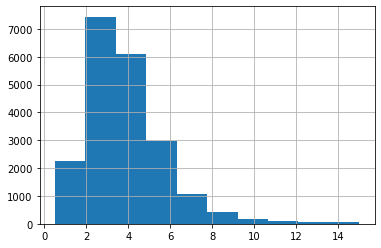

In [32]:
# Reprezentacja mediany dochodów na rysunku 2.9
housing['Mediana dochodów'].hist()

Funkcja `pd.cut()` utwarza atrybuty kategorii dochodów składających się z pięciu kategorii (oznaczonych cyframi od 1 do 5): zkares pierwszej kategorii wynosi od 0 do 1,5 (tzn. poniżej 15 000 dolarów), drugiej kategorii od 1,5 do 3 itd.:

In [33]:
housing['kat_dochodów'] = pd.cut(housing['Mediana dochodów'],
                                bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                labels=[1,2,3,4,5])

In [34]:
housing['kat_dochodów'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: kat_dochodów, dtype: int64

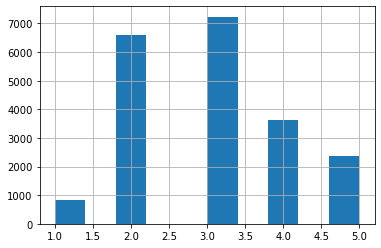

In [35]:
housing['kat_dochodów'].hist()

**Rysunek 2.9** *Histogram kategorii dochodów*

Teraz możemy przeprowadzić próbkowanie warstwowe na podstawie kategorii dochodów. Użyjemy w tym celu klasy `StratifiedShuffleSplit` modułu **Scikit-Learn**:

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['kat_dochodów']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Proporcje kategorii dochodów w zestawie testowym:

In [38]:
strat_test_set['kat_dochodów'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: kat_dochodów, dtype: float64

In [39]:
def income_cat_proportions(data):
    return data["kat_dochodów"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(housing),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [40]:
compare_props

,Łącznie,L. warstwowe,Losowe,Błąd - losowe (%),Błąd - l. warstwowe (%)
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


**Rysunek 2.10** *Porównanie obciążenia próbkowania dla losowania warstwowego i loswego próbkowania*

Teraz powinniśmy usunąć atrybut `income_cut`, dzięki czemu dane zostaną przywrócone do pierwotnego stanu:

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('kat_dochodów',axis=1, inplace=True)

Nie bez powodu poświęciliśmy tyle czasu na zagadnienie tworzenia zbioru testowego: jest to często bagatelizowany, ale jeden z najważniejszych elementów uczenia maszynowego. Do tego wiele poruszanonych tu koncepcji przyda się nam w dalszej części książki, podczas omawiania sprawdzianu krzyżowego. Przejdźmy teraz następnego etapu: **eksplorowania danych.**

## Odkrywaj i wizualizuj dane, aby zdobywać nowe informacje
Stwórzmy kopię zestawu uczącego, aby móc używać go bez przeszkód

In [42]:
housing = strat_train_set.copy()

### Wizualizowanie danych geograficznych
Tworzenie wykresu punktowych wszystkich dystryktów, aby zobaczyć ich rozmieszczenie w układzie współrzędnych:

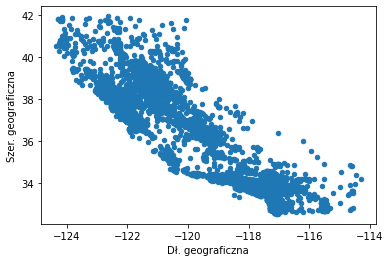

In [43]:
housing.plot(kind='scatter', x='Dł. geograficzna', y='Szer. geograficzna')

**Rysunek 2.11** *Geograficzny wykres punktowy danych*

Po wyznaczeniu wartości 0,1 parametru `alpha` będzie nam o wiele łatwiej zwizualizować miejsce, w którym występuje duże zagęszczenie punktów danych.

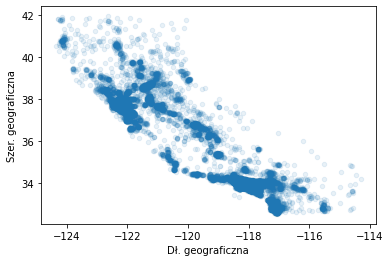

In [44]:
housing.plot(kind='scatter', x='Dł. geograficzna', y='Szer. geograficzna', alpha=0.1)

**Rysunek 2.12** *Lepsza wizualizacja, ukazująca obszary o dużym zagęszczeniu punktów danych*

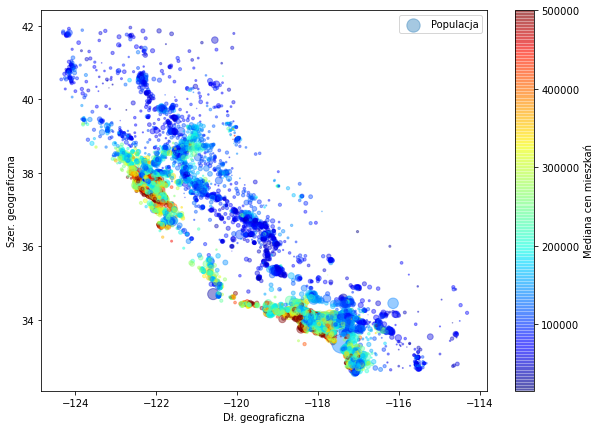

In [45]:
housing.plot(kind='scatter', x='Dł. geograficzna', y='Szer. geograficzna', alpha=0.4,
            s=housing['Populacja']/100, label='Populacja', figsize=(10,7),
            c='Mediana cen mieszkań', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()

**Rysunek 2.13** *Ceny mieszkań w Kalifornii: na czerwowo zostały zaznaczone wysokie ceny mieszkań, na niebiesko niskei ceny, a duże kółka symbolizują obszary o dużym zaludnieniu*

### Poszukiwanie koleracji
Nasz zbiór danych nie jest niezbyt duży, dlatego możemy z łatwością wyliczyć **współczynnik korelacji liniowej** (zwany również **współczynnikiem koleracji Pearsona**) pomiędzy każdą parą wartości za pomocą metody `corr()`:

In [46]:
corr_matrix = housing.corr()

In [47]:
corr_matrix['Mediana cen mieszkań'].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687160
Całk. liczba pokoi        0.135097
Mediana wieku mieszkań    0.114110
Rodziny                   0.064506
Całk. liczba sypialni     0.047689
Populacja                -0.026920
Dł. geograficzna         -0.047432
Szer. geograficzna       -0.142724
Name: Mediana cen mieszkań, dtype: float64

Wartości współczynnika korelacji mieszczą się w zakresie między - 1 a 1. Wartości zbliżone do 1 wskazują silną korelację dodatnią; na przykład mediana cen mieszkań zazwyczaj rośnie wraz ze wzrostem mediany dochodów. Z kolei wartości zbliżone do - 1 mówią nam, że istnieje silna korelacja ujemna; widzimy niewielką korelację ujemną pomiędzy szerokością geograficzną a medianą cen mieszkań (przykładowo ceny nieznacznie spadają, im bardziej kierujemy się na północ). Natomiast wartości bliskie zera oznaczają brak korelacji liniowej.

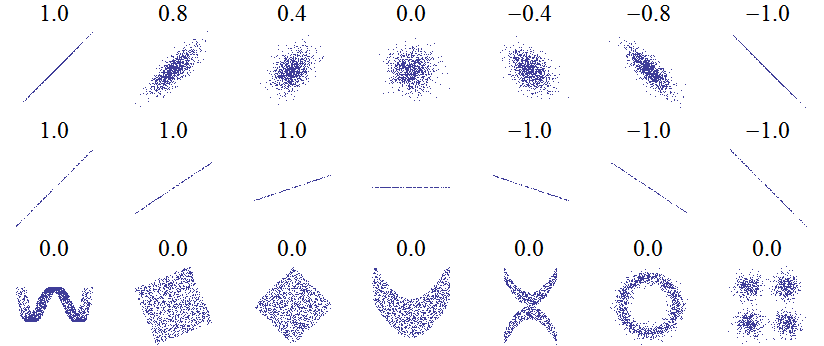

**Rysunek 2.14** *Współczynnik korelacji liniowej dla róźnych zbiorów danych [Wikipedia]*

Innym sposobem sprawdzenia korelacji pomiędzy atrybutami jest użycie funkcji `scatter_matrix` stanowiącej część modułu panda; generuje ona wykres każdego atrybutu numerycznego wobec pozostałych atrybutów numerycznych. Obecnie mamy do dyspozycji 11 atrybutów numerycznych, dlatego uzyskaliśmy w sumie 11^2 = 121 wykresów, kóre łaćznie nie zmieściłyby się na jednej stronie, dlatego skoncentrujemy się na kilku najbardziej obiecujących atrybutach, które wydają się skorelowane w największym stopniu z media cen mieszkań:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4d84b5d60>,
      dtype=object)

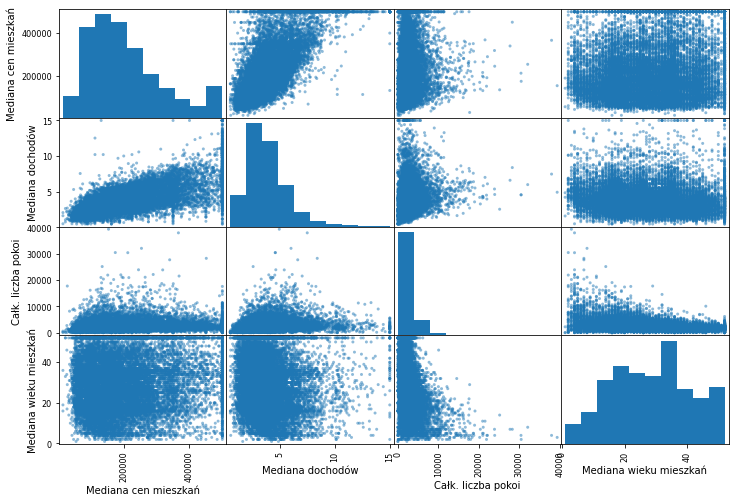

In [48]:
from pandas.plotting import scatter_matrix

attributes = ['Mediana cen mieszkań', 'Mediana dochodów', 'Całk. liczba pokoi', 'Mediana wieku mieszkań']
scatter_matrix(housing[attributes], figsize=(12,8))

**Rysunek 2.15** *Zaprezentowany wykres rozproszenia pokazuje każdy atrybut numeryczny w stosunku do pozostałych atrybutów numerycznych, a także histogram poszczególnych atrybutów*

Najbardziej obiecującym atrybutem służącym do prognozowania mediany cen mieszkań jest mediana dochodów, dlatego przyjrzymy się uważniej ich wykresowi korelacji.

(0.0, 16.0, 0.0, 550000.0)

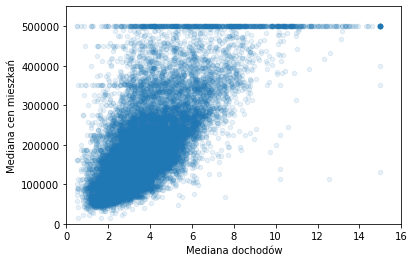

In [49]:
housing.plot(kind='scatter', x='Mediana dochodów', y='Mediana cen mieszkań', alpha=0.1)
plt.axis([0,16,0,550000])

**Rysunek 2.16** *Wykres mediany cen mieszkań w funcki mediany dochodów*

In [50]:
housing['Pokoje_na_rodzinę']=housing['Całk. liczba pokoi']/housing['Rodziny']
housing["Sypialnie_na_pokoje"]=housing['Całk. liczba sypialni']/housing['Całk. liczba pokoi']
housing['Populacja_na_rodzinę']=housing['Populacja']/housing['Rodziny']

In [51]:
corr_matrix = housing.corr()
corr_matrix["Mediana cen mieszkań"].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687160
Pokoje_na_rodzinę         0.146285
Całk. liczba pokoi        0.135097
Mediana wieku mieszkań    0.114110
Rodziny                   0.064506
Całk. liczba sypialni     0.047689
Populacja_na_rodzinę     -0.021985
Populacja                -0.026920
Dł. geograficzna         -0.047432
Szer. geograficzna       -0.142724
Sypialnie_na_pokoje      -0.259984
Name: Mediana cen mieszkań, dtype: float64

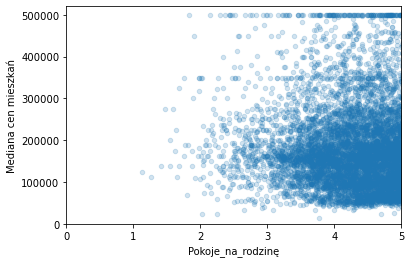

In [52]:
housing.plot(kind='scatter', x='Pokoje_na_rodzinę', y='Mediana cen mieszkań', alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [53]:
housing.describe()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Pokoje_na_rodzinę,Sypialnie_na_pokoje,Populacja_na_rodzinę
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Przygotuj dane pod algorytmy uczenia maszynowego

In [54]:
housing = strat_train_set.drop('Mediana cen mieszkań', axis=1) #usuwa etykiety w zbiorze uczącym
housing_labels = strat_train_set['Mediana cen mieszkań'].copy()

### Oczyszczanie danych
Większość algorytmów uczenia maszynowego nie może działać, jeśli brakuje jakichś cech, dlatego stworzymy kilka funkcji zajmujących się tym problemem. Jak wiemy, w atrybucie `total_bedrooms` brakuje kilku wartości, należy więc to zmienić. Mamy trzy możliwości:
1. pozbyć się dystryktów zawierających brakujące dane;
2. pozbyć się całego atrybutu;
3. uzupełnić dane określoną wartością (zero, średnia, mediana itd.).

In [55]:
housing = strat_train_set.drop("Mediana cen mieszkań", axis=1) # usuwa etykiety w zbiorze uczącym
housing_labels = strat_train_set["Mediana cen mieszkań"].copy()

In [56]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [57]:
# pierwsza możliwość
sample_incomplete_rows.dropna(subset=["Całk. liczba sypialni"])

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu


In [58]:
# druga możliwość
sample_incomplete_rows.drop("Całk. liczba sypialni", axis=1)

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [59]:
# Trzecia możliwość
median = housing["Całk. liczba sypialni"].median()
sample_incomplete_rows["Całk. liczba sypialni"].fillna(median, inplace=True)
sample_incomplete_rows

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


Moduł Scikit-Learn zawiera przydatna klasę zajmującą się brakującymi wartościami: `SimpleImputer`. Korzystamy z niej w następujący sposób: najpierw tworzymy wystąpienie klasy `SimpleImputer`, w którym zaznaczamy, że chemy zastąpić brakujaće wartości każdego atrybuty medianą tego atrybutu:

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [61]:
housing_num = housing.drop('Odległość do oceanu', axis=1)

In [62]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [63]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
X = imputer.transform(housing_num)

In [66]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [67]:
housing_tr.loc[sample_incomplete_rows.index.values]

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


## Konstrukcja modułu Scikit-Learn

1. **Jednolitość** – wszystkie obiekty korzystałem z jednolitego, prostego interfejsu:

      – **Estymatory (funkcje oszacowujące)**. Każdy obiekt zdolny do oszacowania pewnych parametrów na podstawie zbioru danych jest zwany **estymatorem** (np. klasa `imputer` jest funkcją oszacowującą). Sama operacja szacowania jest wykonywana przez metodę `fit()`, zaś jej jedynym parametrem jest zbiór danych (lub dwa zestawy danych w przypadku algorytmów uuczenia nadzorowanego; drugi zbiór zawiera etykiety). Wszelkie inne parametry wpływające na przebieg operacji szacowania są uznane za hiperparametry (np. parametr `strategy` klasy `imputer`) – muszą być on wyznaczony jako zmienne wystąpienia (generalnie w postaci parametru konstruktora).
    <br>– **Transformatory (funkcje transformujące lub przekształcające**). Niektóre estymatory (jak na przykład klasa `imputer`) są w stanie również przekształcać zbiór danych; są one zwane **transformatorami**.
    <br>– **Predyktory (funkcje prognostyczne)**. Pewne estymatory są w stanie przewidywać wyniki na podstawie zbioru danych; są to tak zwane **predyktory**. Na przykład model `LinearRegression` z poprzedniego rozdziału stanowi predyktor: przewidzieliśmy za jego pomocą satysfakcję z życia, znając wartości PKB per capita danego kraju. Funkcja prognostyczna zawiera metodę `predict()` przyjmującą nowe zbiory danych i zwracającą zestaw powiązanych z nimi prognoz.
    
    
2. **Inspekcja** – wszystkie hiperparametry estymatorów są bezpośrednio dostępne poprzez publiczne zmienne wystąpień (np. `imputer.strategy`); wszystkie wyuczone parametry funkcji oszacuwującej są dostępne poprzez tego typu zmienne oznaczone na końcu podkreślnikiem (np. `imputer.statistics_)`.


3. **Nierozprzestrzenianie klas**. Zbiory danych nie są reprezentowane w postaci własnoręcznie przygotowanych klas, lecz jako macierze NumPy lub macierze rzadkie SciPy. Z kolei hiperparametry to standardowe ciągi znaków lub wartości liczbowe języka Python.


4. **Kompozycja**. Istniejące elementy składowe są używane tak często, jak to możliwe. Przykładowo, łatwo stworzyć estymator `Pipeline` z samodzielnei dobranej sekwencji funkcji transofrmujących zakończonych ostatnią funkcją oszacowującą, o czym przekonamy się już niebawem.


5. **Rozsądne wartości domyślne**. Moduł Scikit-Learn zawiera przemyślane wartości domyślne dla większości parametrów, dzięki czemu możemy z łatwością tworzyć bazowy system roboczy.

### Obsługa teksty i atrybutów kategorialnych
Do tej pory zajmowaliśmy się wyłącznie atrybutami numerycznymi, przejdźmy jednak teraz do atrybutów tekstowych. Używanym przez nas zestawie danych występuje tylko jeden atrybut tego typu: `ocean_proximity (Odległość do oceanu)`. Przyjrzyjmy się wartościom jego pierwszych dziesięciu przykładów:

In [68]:
housing_cat = housing[['Odległość do oceanu']]

In [69]:
housing_cat.head(10)

,Odległość do oceanu
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Nie jest to typowy tekst: istnienie tu ograniczona liczba wartości, których każda reprezentuje atrybut kategorialny. Większość algorytmów uczenia maszynowego lepiej sobie radzi z liczbami, przekształćmy więc te kategorie z tekstu na wartości numeryczne. Możemy w tym celu użyć klasy `OrdinalEncoder`:

In [70]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Możemy uzyskać listę kategorii za pomocą wystąpienia zmiennej `categories_`:

In [71]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Istnieje pewien problem z tym rozwiązaniem: uczenia maszynowego będą uznawały że dwie zbliżone wartości będą bardziej do siebie podobne niż to w dalszym wartości. W pewnych przypadkach nie stanowi to problemu (przy uporządkowanych kategoriach, takich jak "zły", "przeciętny", "dobry" i "znakomity"), ale oczywiście nie dotyczy to kolumny `ocean_proximity` (np. kategorie 0i 4 są wyraźnie bardziej do siebie podobne niż 0 i 1). Powszechnie stosowanym rozwiązaniem stworzenie jednego binarnego atrybutu dla każdej kategorii: jeden atrybut ma wartość 1, gdy kategorią jest `<1H OCEAN` (w przeciwnym wypadku otrzymuje wartość 0), inny atrybut uzyskuje wartość 1 dla kategorii `INLAND` (i 0 dla pozostałych kategorii) itd. Jest to tzw. **kodowanie "gorącojedynkowe"**, ponieważ tylko jeden atrybut będzie "gorący" (będzie miał wartość 1), podczas gdy pozostałe będą "zimne" (wartość 0). Nowe atrybuty są czasami nazywane **atrybutami sztucznymi**. Moduł Scikit-Learn zawiera koder `OneHotEncoder`, konwertujący kategorialne wartości całkowite na wektory "gorącojedynkowe".

In [72]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Powyższy wynik operacji to **macierz rzadka** (*sparse matrix*) SciPy, nie tablice NumPy. Jeżeli chcemy ją przekształcić w tablicę NumPy (gęsta), wystarczy wywołać metodę `toarray()`:

In [73]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Możemy również uzyskać listę kategorii za pomocą wystąpienia zmiennej `categories_` kodera:

In [74]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Stwórzmy niestandardowy transformator pot to, aby wprowadzić dodatkowe atrybuty:

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

# indeks kolumny
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [76]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['Pokoje_na_rodzinę','Populacja_rodzinę'],
    index=housing.index)
housing_extra_attribs.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu,Pokoje_na_rodzinę,Populacja_rodzinę
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


W tym przykładzie transformator zawiera jeden hiperparametrm `add_bedrooms_per_room`, którego domyślną wartością jest `True` (warto dawać rozsądne wartości domyślne). Dzięki temu hiperparametrowi z łatwością możesz sprawdzić, czy dodanie atrybutu `Sypialnie_na_pokoje` bardziej pomoże, czy zaszkodzi algorytmowi uczenia maszynowego. Mówiąc bardziej ogólnie, za pomocą hiperparametru możesz bramkować każdy etap przygotowania danych, którego skuteczności nie jesteś pewny. Imbardziej zautomatyzujesz etapy przygotowania danych, tym więcej ich kombinacji możesz wypróbować, dzięki czemu znacznie zwiększasz szancę na odkrycie znakomitej kombinacji i zaoszczędzisz czas.

## Skalowanie cech

Jednym z najważniejszych przekształceń wykonywanych na danych jest **skalowanie cech**. Większość algorytmów uczenia maszynowego słabo sobie radzi z atrybutami numerycznymi znajdującymi się w różnych zakresach skali. Dotyczy to również naszego zbioru danych: całkowita liczba pomieszczeń mieści się w zakresie od 6 do 39 320, z kolei wartość median dochodów to zakres zaledwie od 0 do 15. Zauważmy, że generalnie nie jest wymagane skalowanie wartości docelowych.

Najczęściej są stosowane dwa rodzaje skalowania wszystkich atrybutów do jednego poziomu: **skalowanie min-max** (*min-max scaling*) i **standaryzacja** (*standarization*).

Skalowanie min-max (zwane również **normalizacją**) jest najprostszym procesem: wartości są tak skalowane, że mieszczą się w zakresie pomiędzy 0 i 1. Dokonujemy tego, odejmując od danych wartości wartość minimalną i dzieląc otrzymany wynik przez różnicę wartości maksymalnej i minimalnej. w module Scikit-Learn służy do tego funkcja transformująca `MinMaxScaler`. Zawiera ona hiperparametr `feature_range`, pozwalający zmieniać zakres skali, jeśli z jakiegoś powodu nie odpowiada Ci domyślny zakres 0–1.

Mechanizm standaryzacji jest odmienny: najpierw odejmujemy od danej wartości średnią (czyli średnia w standaryzowanych próbkach zawsze wynosi 0), a następnie dzielimy ją przez odchyleie standardowe, dzięki czemu wynikowy rozkład ma wariancję jednostkową. W przeciwieństwie do skalowania min-max standaryzacja nie ogranicza skalowanych wartości do określonego zakresu, co w przypadku niektórych algorytmów stanowi pewien problem (np. sieci neuronowe często oczekują wartości wejściowych mieszczących się w zakresie 0-1). Z drugiej strony, standaryzacja jest znacznie mniej wrażliwa na elementy odstające. Załóżmy, na przykład, czy przez pomyłkę mediana dochodów dla danego dystryktu jest równe 100. W przypadku skalowania min-max wszystkie pozostałe wartości z przedziału 0-15 zostałyby umieszczone w zakresie 0-0.15, natomiast nie miałoby to tak wielkiego wpływu na standaryzowane wyniki. Standaryzację w module Scikit-Kearn uzyskujemy za pomocą transformatora `StandardScaler`.

## Potoki transformujące

Jak widać, należy przeprowadzić wiele operacji przekształcenia we właściwej kolejności. Dzięki klasie `Pipeline` można wyznaczyć odpowiednią sekwencję tranformacji. Poniżej przedstawiony jest niewielki potok stosowany wobec atrybutów numerycznych:

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [78]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['Odległość do oceanu']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [80]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Wybór i uczenie modelu
Określiliśmy ramy problemu, zdobyliśmy i przeanalizowaliśmy dane, przetestowaliśmy zestawy uczący i testowy, a także napisaliśmy potoki służące do automatycznego oczyszczenia i przygotowanie danych pod algorytm uczenia maszynowego. Jesteśmy gotowi, aby wybrać i wytrenować modelu uczenia maszynowego.

### Trenowanie i ocena modelu za pomocą zbioru uczącego
Dzięki wszystkim wcześniejszym czynnością dalsze etapy będą znacznie prostsze, niż Ci się wdayhe. Wyuczumy najpierw model regresji liniowej, podobnie jak dokonaliśmy tego w poprzednim rozdziale.

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [82]:
# Przetestujmy pełen potok na kilku przykładach uczących
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [83]:
print('Prognozy:', lin_reg.predict(some_data_prepared))

Prognozy: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [84]:
print('Etykiety:', list(some_labels))

Etykiety: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Model działa, chociaż prognozy nie są zbyt dokładne (np. pierwsza prognoza odstaje od etykiet niemal o 40%!). Zmierzmy błąd RSME modelu regresji dla całego zbiru uczącego za pomocą funkcji `mean_squared_error()`:

In [85]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Ten wynik nie jest powalający: wartości atrybutów `Mediana cen mieszkań` dla większości dystryktów mieszczą się w zakresie pomiedzy 120 000 a 265 000 dolarów, dlategi standardowy błąd predykcji rzędu 68 628 dolarów nie jest zbyt satysfakcjonujący. Widzimy tu klasyczny przykład niedotrenownia modelu wobec danych uczących. Podstawowym sposobem radzenia sobie z tym problemem jest wybór potężniejszego algorytmu, wprowadzenie lepszych cech lub zmniejszenie ograniczeń modelu. Nasz model nie jest regularyzowany, dlatego ta ostatnia odpada.

Sprawdźmy najpierw bardziej skomplikowany model, `DecisionTreeRegressor`. Jest to zaawansowany model potrafiący wyszukiwać w danych skomplikowane, nieliniowe zależności:

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Po wyuczeniu modelu sprawdźmy jego wydajność wobec zbioru uczącego:

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Żadnego błedu? Czyżby ten model był stuprocentowo bezbłędny? Oczywiście je o wiele bardziej prawdopodobne, że model po prostu został znacznie przetrenowany. Skąd można to wiedzieć. Wiemy już, że nie chcemy używać zbioru uczącego, dopóki nei będziemy w pełni przekonani o skutenczości wybranego modelu, dlatego musimy wykorzystać część zbioru uczącego trenowania, a część do ocenienia modelu.

## Dokładniejsze ocenianie za pomocą sprawdziany krzyżowego
Jednym ze sposobów oceniania modelu drzewa decyzyjnego byłoby wykorzystanie funkcji `train_test_split()` do rozdzielenia zestawu uczączego na podzbiory trenujący i walidacyjny, następnie wyuczenie naszego modelu przy użyciu tego zbioru trenująćego, po czym ewalujaca za pomocą zbioru walidacyjnego.

Inną alternatywą jest użycie funkcji k-krotnego **sprawdzianu krzyżowego (kroswalidacji**, *k-fold cross-validation*). Za pomocą poniższego kodu zbiór uczący zostaje podzielony na 10 oddzielnych **podzbiorów** (*folds*), następnie przeprowadzone jest dziesięciokrotnie trenowanie i ocenianie modelu drzewa decyzyjnego (Za każdym razem zostaje wybrany inny podzbiór do oceny wydajności modelu, a dziewięć pozostałych służy do uczenia). W konsekwencji uzyskujemy tablicę zawierającą 10 wyników ewaluacji:

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def display_scores(scores):
    print("Wyniki:", scores,'\n')
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

In [90]:
display_scores(tree_rmse_scores)

Wyniki: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027] 

Średnia: 71407.68766037929
Odchylenie standardowe: 2439.4345041191004


Model drzewa decyzyjnego nie wygląda teraz już tak dobrze. W rzeczywistości wygląda na to, że sprawuje się nawet gorzej niż modele regresji liniowej! Za pomocą sprawdzianu krzyżowego możemy nie tylko oszacować wydajność naszego modelu, lecz także zmierzyć precyzję oszacowań (tj. odchylenie standardowe).

Dla pewności przeprowadźmy sprawdzian krzyżowy dla modelu regresji liniowej:

In [91]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067] 

Średnia: 69052.46136345083
Odchylenie standardowe: 2731.6740017983475


**ZGADZA SIĘ**: Model drzewa decyzyjnego ulega tak silnemu przetrenowaniu, że osiąga gorsze wyniki od modelu regresji liniowej.

Sprawdźmy jeszcze jeden model: `RandomForestReggresor`: Mechanizm działania modeli losowego lasu polega na uczeniu wielu drzew decyzyjnych za pomocą różnych podzbiorów cech, po czym następuje uśrednienie otrzymanych prognoz. Konstruowanie modelu na podwalinach wielu innych modeli nazywamy metodami **uczenia zespołowego** (*ensemble learninig*) – dzięki temu rozwiązaniu uzyskujemy jeszcze lepszą wydajność stosowanych algorytmów:

In [92]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [93]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [94]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [95]:
display_scores(forest_rmse_scores)

Wyniki: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ] 

Średnia: 50182.303100336096
Odchylenie standardowe: 2097.0810550985693


## Wyreguluj swój model

### 1. Metoda przeszukiwania siatki

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # sprawdza 3*4 = 12 kombinacji wartości hiperparametrów
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # a następnie sprawdza 2*3 = 6 kombinacji z wyłączonym parametrem bootstrap (False)
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# przeprowadza proces uczenia na pięciu podzbiorach, czyli łącznie (12+6)*5=90 przebiegów
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [98]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [99]:
# Wyniki ewaluacji
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [100]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045542,0.002160,0.002676,0.000175,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.149103,0.005705,0.007197,0.000372,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.443442,0.004764,0.020917,0.001031,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.074702,0.001534,0.002734,0.000180,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.242787,0.002327,0.007360,0.000126,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.716777,0.008235,0.020273,0.000400,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.097895,0.003231,0.002591,0.000037,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.332245,0.003800,0.007401,0.000250,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.813805,1.601157,0.020580,0.000738,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.125867,0.001291,0.002647,0.000123,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


### 2. Metoda losowego przeszukiwania

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4b983c2e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4b983c8b0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [102]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [103]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [104]:
#Wynik ewaluacji
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [105]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.836238,0.019432,0.117300,0.000749,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.274768e+09,-2.475113e+09,-2.558241e+09,-2.261587e+09,-2.509251e+09,-2.415792e+09,1.234603e+08,1
1,0.429515,0.003019,0.010475,0.000318,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.493183e+09,-2.727145e+09,-2.747621e+09,-2.505491e+09,-2.731163e+09,-2.640921e+09,1.158711e+08,9
2,1.372390,0.007491,0.047456,0.000954,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.432244e+09,-2.669938e+09,-2.663783e+09,-2.416819e+09,-2.718463e+09,-2.580249e+09,1.286391e+08,7
3,0.602452,0.005711,0.014269,0.000151,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.425443e+09,-2.685426e+09,-2.684721e+09,-2.445756e+09,-2.679708e+09,-2.584211e+09,1.215266e+08,8
4,4.639759,0.009002,0.080630,0.000684,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.295829e+09,-2.490105e+09,-2.567315e+09,-2.275918e+09,-2.513890e+09,-2.428612e+09,1.193643e+08,2
5,1.432494,0.007194,0.048855,0.000533,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.426584e+09,-2.662806e+09,-2.668221e+09,-2.416089e+09,-2.716755e+09,-2.578091e+09,1.294038e+08,6
6,1.679303,0.004692,0.057210,0.000425,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.421750e+09,-2.650683e+09,-2.663952e+09,-2.405542e+09,-2.701799e+09,-2.568745e+09,1.278469e+08,5
7,2.867449,0.012026,0.065445,0.000870,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.293212e+09,-2.538021e+09,-2.595201e+09,-2.312129e+09,-2.566701e+09,-2.461052e+09,1.307136e+08,3
8,2.866940,0.011485,0.097595,0.001116,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.397906e+09,-2.625800e+09,-2.656686e+09,-2.381674e+09,-2.675865e+09,-2.547586e+09,1.299283e+08,4
9,0.058788,0.000764,0.002042,0.000101,5,2,"{'max_features': 5, 'n_estimators': 2}",-3.977848e+09,-4.159390e+09,-4.040393e+09,-4.162441e+09,-4.415951e+09,-4.151204e+09,1.500772e+08,10


### 3. Metoda zespołowe ➡️ rozdział VII

***

## Analizuj najlepsze modele i błędy
Co zyskasz wiele informacji na temat problemu, sprawdzając najlepsze modele. Na przykład model `RandomForestRegressor` może wskazywać względną istotność każdego atrybutu w generowaniu dokładnych prognoz:

In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [107]:
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Połączymy teraz te wyniki chce trudności z odpowiadającymi im nazwami atrybutów:

In [108]:
extra_attribs = ["Pokoje_na_rodzinę", "Populacja_na_rodzinę", "Sypialnie_na_pokoje"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'Mediana dochodów'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'Populacja_na_rodzinę'),
 (0.07334423551601243, 'Dł. geograficzna'),
 (0.06290907048262032, 'Szer. geograficzna'),
 (0.056419179181954014, 'Pokoje_na_rodzinę'),
 (0.053351077347675815, 'Sypialnie_na_pokoje'),
 (0.04114379847872964, 'Mediana wieku mieszkań'),
 (0.014874280890402769, 'Populacja'),
 (0.014672685420543239, 'Całk. liczba pokoi'),
 (0.014257599323407808, 'Rodziny'),
 (0.014106483453584104, 'Całk. liczba sypialni'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

Dzięki uzyskanym informacje możesz zrezygnować z niektórych mniej przydatnych cechach (przykładowo, wygląda na to, że tylko kategoria `ocean_proximity` jest użyteczna, dlatego warto spróbować usunąć pozostałe).

## Oceń system za pomocą zbioru testowego

Po etapie strojenia modeli w końcu uzyskasz system sprawujący się wystarczająco dobrze. Nadszedł czas, aby ocenić jego wydajność za pomocą zbioru danych testowych. Proces ten nie wyróżnia się niczym szczególnym; pobierz przykład i etykiety z zestawu testowego:
- wykorzystaj potok `full_pipeline` do przekształcenia tych danych
- wywołaj funkcję `transform()`, a **nie** `fit_transform()`, bo nie chcesz dopasowywać modelu do danych testowych!
- oceń ostateczny model za pomocą tego zbioru testowego

In [109]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('Mediana cen mieszkań', axis=1)
y_test = strat_test_set['Mediana cen mieszkań'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:
final_rmse

47730.22690385927

W pewnych sytuacjach takie punktowe oszacowanie błędu uogólniania może okazać się nie wystarczająco przekonujące: A jeżeli model jest zaledwie o 0,1% lepszy od obecnego używanego w środowisku produkcyjnym? Być może chcesz się dowiedzieć, jak precyzyjnie jest to oszacowanie. W tym celu możesz obliczyć 95% **przedział ufności** (*confidence interval*) dla błędu uogólniania za pomocą funcji `scipy.stats.t.interval()`:

In [111]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

## Ćwiczenia 103 (Rodział II.)
Poniższe ćwiczenia bazują na omówionym w tym rozdziale zestawie danych *Housing*:

**1.** Wypróbuj regresor maszyny wektorów nośnych (`sklearn.svm.SVR`) przy użyciu różnych hiperparamentrów, takich jak `kernel='linear'` (oraz różnych wartości hiperparametrów `C`) lub `kernel='rbf'` (oraz różnych wartości hiperparametrów `C` i `gamma`). Na razie nie przejmuj się tym, że nie wiesz, do czego te hiperparametry służą. Jak się spisuje najlepszy predyktor maszyny wektorów nośnych?

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   4.5s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   4.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.4s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=0.3, kernel=rbf, total=   6.3s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.1s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.1s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   7.5s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] .

[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=   8.2s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=   7.9s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total= 1.3min
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   6.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   7.9s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   7.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total= 1.3min
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .

[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.0s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] .

[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   7.4s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total= 1.3min
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   5.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   8.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   8.2s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   7.2s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   9.7s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 58.7min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [126]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.84006944533

Jest to znacznie gorszy rezultat od uzyskanego za pomocą klasy `RandomForestRegressor`. Sprawdźmy, jakie najlepsze hiperparametry zostały znalezione:

In [127]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

Jądro liniowe wydaje się być lepsze od jądra RBF. Zwróć uwagę, że wartość parametru `C` stanowi maksymalną przetestowaną wartość. W takiej sytuacji zdecydowanie należy uruchomić ponownie przeszukiwanie siatki z większymi wartościami tego hiperparametru (usuwając jednocześnie mniejsze wartości), ponieważ prawdopodobnie któraś z nich będzie jeszcze lepiej dostosowana do modelu.
***

**2.** Spróbuj zastąpić klasę `GridSearchCV` klasą `RandomizedSearchCV`.

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# na stronie https://docs.scipy.org/doc/scipy/reference/stats.html
# znajdziesz dokumentację funkcji `expon()` i `reciprocal()`, a także innych funkcji rozkładu prawdopodobieństwa.

# UWAGA: paramert gamma jest ignorowany, gdy korzystamy z jądra 'linear'

param_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, n_iter=50, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.4s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.5s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.4s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   7.9s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   8.2s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   8.0s
[CV] C=26290.2

[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  42.8s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  32.2s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  40.1s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  35.3s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  27.1s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   5.2s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   5.3

[CV]  C=761.4316758498783, gamma=2.6126336514161914, kernel=linear, total=   4.2s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  22.7s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  26.1s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  47.8s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  31.7s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total= 1.3min
[CV] C=2423.0759984939164, gamma=3.248614270240346, kernel=linear ....
[CV]  C=2423.0759984939164, gamma=3.248614270240346, kernel=linear, total=   

[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  21.4s
[CV] C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total= 1.4min
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   8.6s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.7s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.6s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total= 1.3min
[CV] C=399.7268155705

[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   5.2s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   5.2s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total= 1.2min
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.0s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   6.2s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   9.1s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.9s
[CV] C=2

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 73.7min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4bf8f4b50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4bf8f4fa0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)